In [30]:
#Necessary libraries
import pandas as pd
import seaborn as sns

In [31]:
#Read data
data = pd.read_csv('winequality-red.csv')

In [32]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
#Creating a column of goodquality to convert the problem into a binary classification problem.
data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]

In [36]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


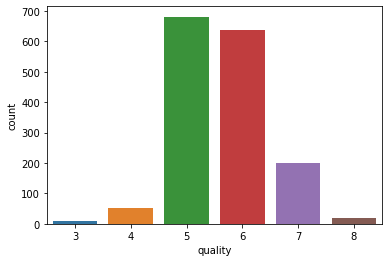

In [37]:
#Histogram showing numbers of wines in quality types.
sns.countplot(x=data["quality"])

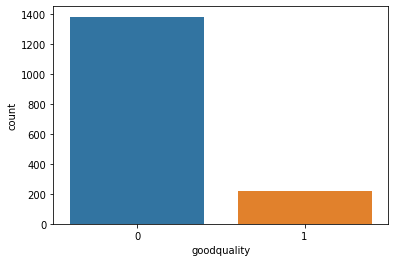

In [38]:
#Histogram showing good quality wine count.
sns.countplot(x=data["goodquality"])

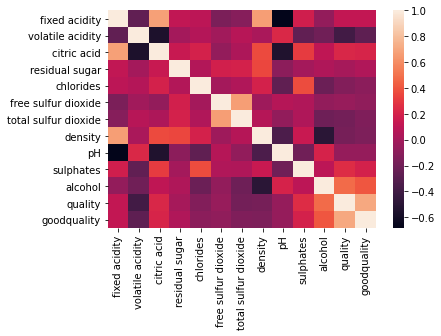

In [39]:
#Heatmap to see which component has the highest correlation with quality.
sns.heatmap(data.corr())

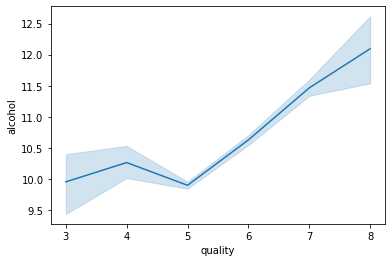

In [40]:
#As shown above alcohol has the highest correlation with quality.
#A line chart to investigate this relation
#This shows a positive relation between alcohol and quality.
sns.lineplot(x=data['quality'], y=data['alcohol'])

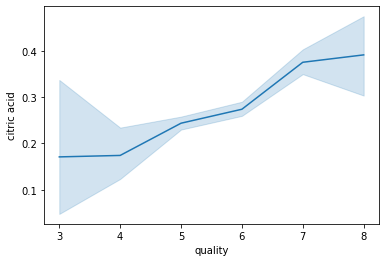

In [41]:
#Second highest relation with quality.
#A line chart to investigate this relation
#This shows a positive relation between citric acid and quality.
sns.lineplot(x=data['quality'], y=data['citric acid'])

In [42]:
features = ['fixed acidity', 'volatile acidity','citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

label = ['goodquality']
#Choosing necessary features and target label.

#Assigning values
X = data[features].values
Y = data[label].values

In [43]:
from sklearn.model_selection import train_test_split
#Splitting train and test data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [ ]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
prediction_logreg = log_reg.predict(X_test)
cm_logreg = confusion_matrix(y_test, prediction_logreg)
accuracy_logreg = accuracy_score(y_test, prediction_logreg)
#Cross validation
lr_cross_val = cross_val_score(log_reg, X_train, y_train, cv=5)

In [45]:
print(f"Confusion Matrix of Logistic Regression \n {cm_logreg}")
print(f"Accuracy of Logistic Regression = {accuracy_logreg*100}%")
print(f"The five cross validation results are = {lr_cross_val}")

Confusion Matrix of Logistic Regression 
 [[401  12]
 [ 52  15]]
Accuracy of Logistic Regression = 86.66666666666667%
The five cross validation results are = [0.87946429 0.89285714 0.87053571 0.90178571 0.88340807]


In [ ]:
#Applying KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, prediction_knn)
accuracy_knn = accuracy_score(y_test, prediction_knn)
#Cross validation
knn_cross_val = cross_val_score(knn, X_train, y_train, cv=5)


In [47]:
print(f"Confusion Matrix of KNN \n {cm_knn}")
print(f"Accuracy of KNN = {accuracy_knn*100}")
print(f"The five cross validation results are = {knn_cross_val}")

Confusion Matrix of KNN 
 [[399  14]
 [ 54  13]]
Accuracy of KNN = 85.83333333333333
The five cross validation results are = [0.84821429 0.85714286 0.86160714 0.84821429 0.85201794]


In [48]:
#Applying Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
prediction_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, prediction_dtc)
accuracy_dtc = accuracy_score(y_test, prediction_dtc)
#Cross validation
dtc_cross_val = cross_val_score(dtc, X_train, y_train, cv=5)

In [49]:
print(f"Confusion Matrix of DTC \n {cm_dtc}")
print(f"Accuracy of DTC = {accuracy_dtc*100}")
print(f"The five cross validation results are = {dtc_cross_val}")

Confusion Matrix of DTC 
 [[376  37]
 [ 24  43]]
Accuracy of DTC = 87.29166666666667
The five cross validation results are = [0.85267857 0.88392857 0.86160714 0.89285714 0.83408072]


## The results may be different from the report since I have run the code multiple times.